In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1446,2020-08-28,United Kingdom,330141.0,330368.0,41514.0,41477.0,-227.0,37.0
1447,2020-08-28,Germany,239340.0,239507.0,9294.0,9288.0,-167.0,6.0
1448,2020-08-28,Iran,367171.0,367796.0,21148.0,21137.0,-625.0,11.0
1449,2020-08-28,Turkey,263776.0,263998.0,6204.0,6209.0,-222.0,-5.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7399.388008270159
RMSE =  29404.700361684372


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  296.94900068917985
RMSE =  728.6439303645259


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  51300.659420289856
RMSE =  92235.33993010347
-- World performances for deaths --
MAE =  1643.2826086956522
RMSE =  2014.570877095313


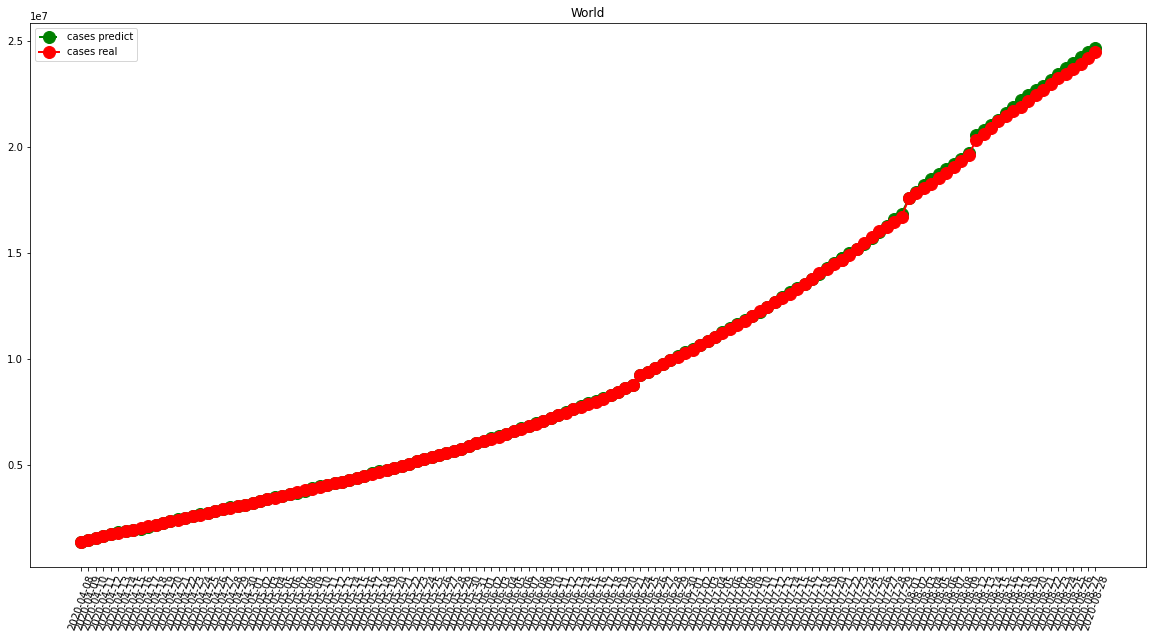

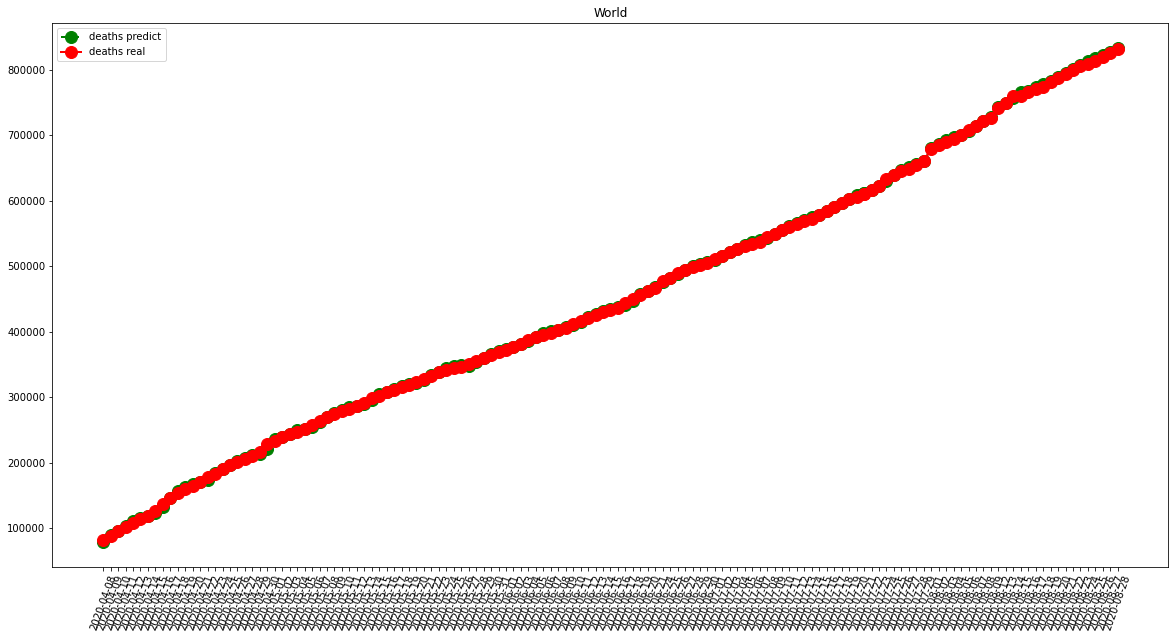

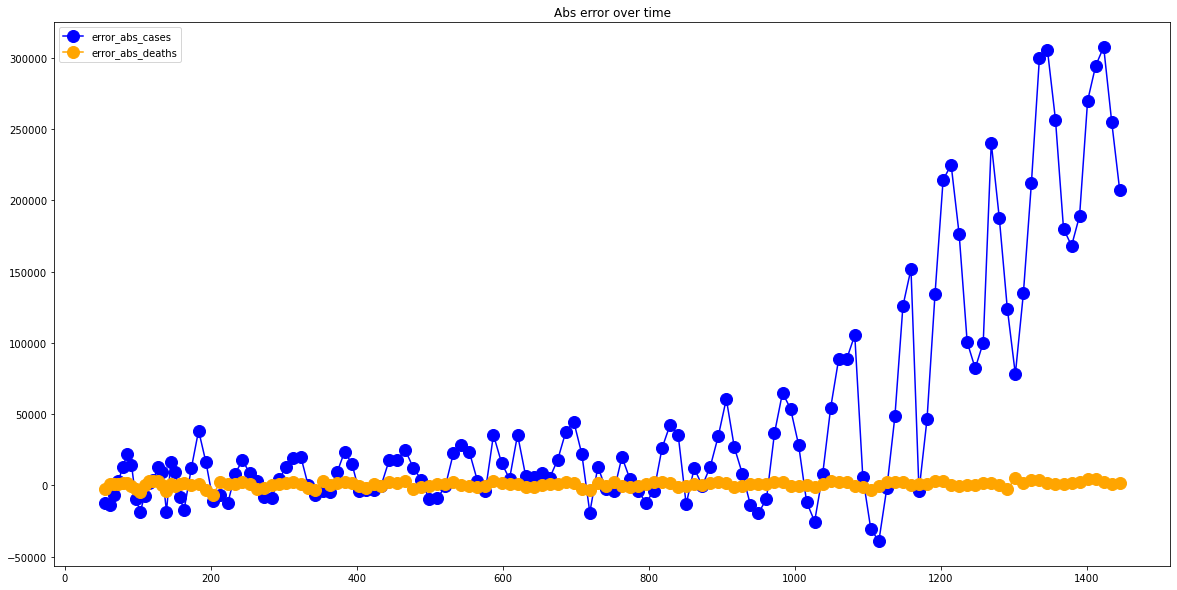

In [7]:
visShow("World")

-- France performances for cases --
MAE =  956.4797297297297
RMSE =  1447.695972356896
-- France performances for deaths --
MAE =  125.58108108108108
RMSE =  275.6748231306372


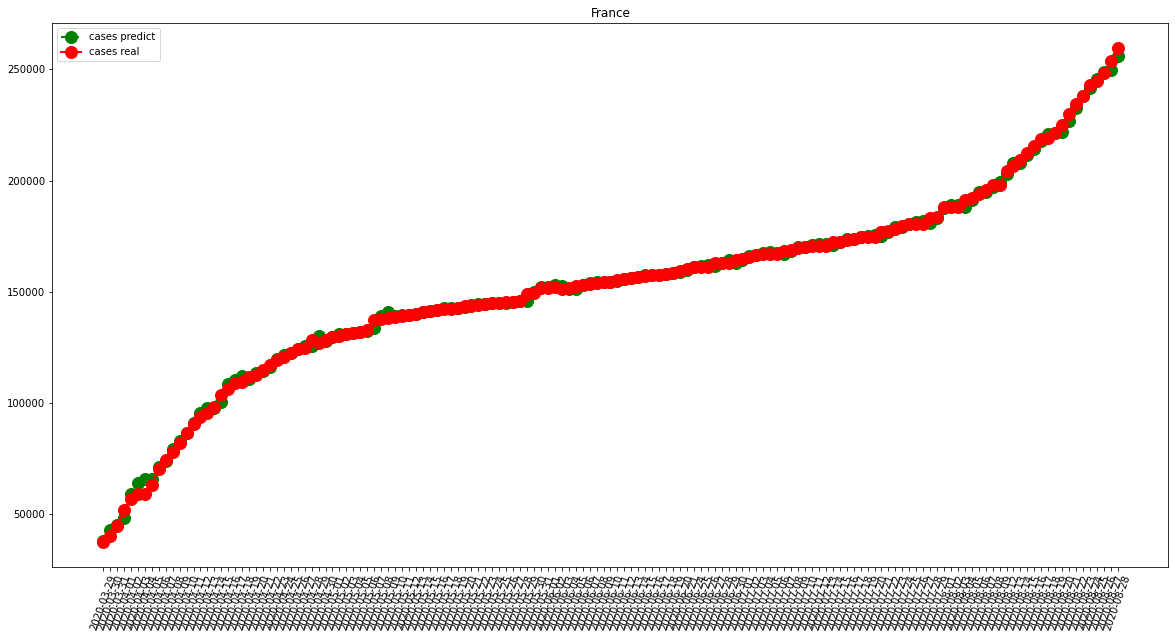

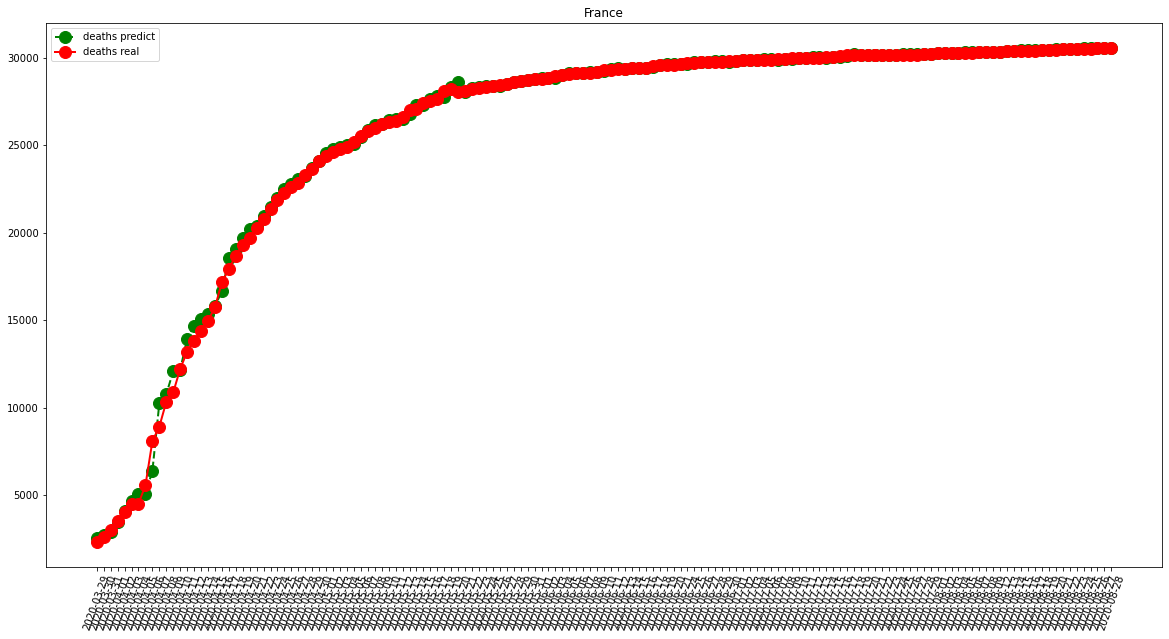

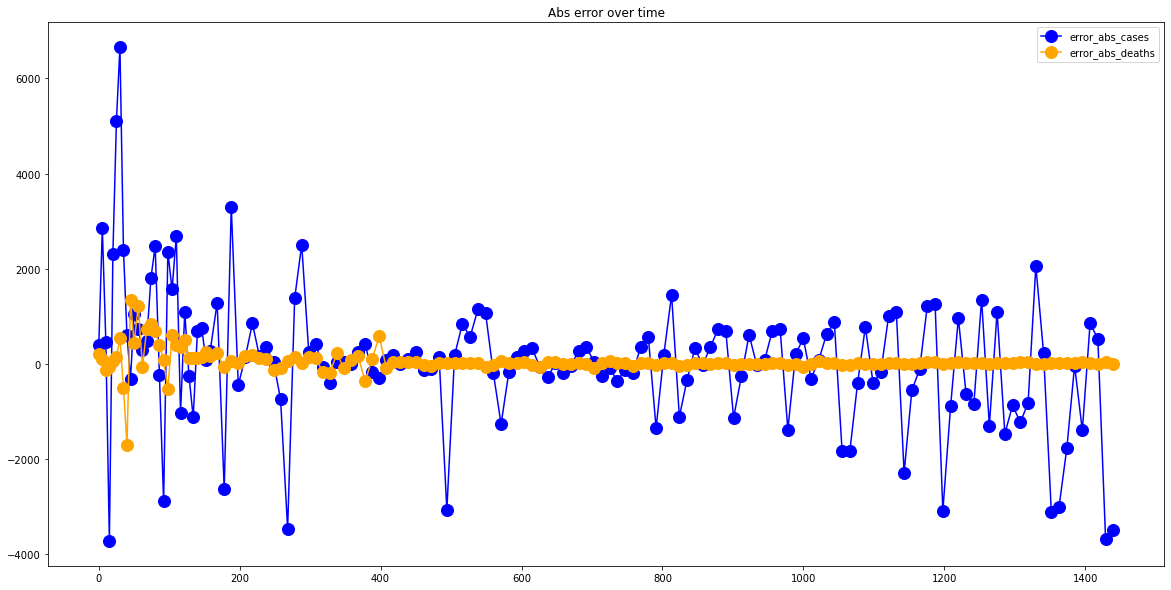

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.8918918918919
RMSE =  460.3199533579437
-- Italy performances for deaths --
MAE =  74.64189189189189
RMSE =  243.97905038553418


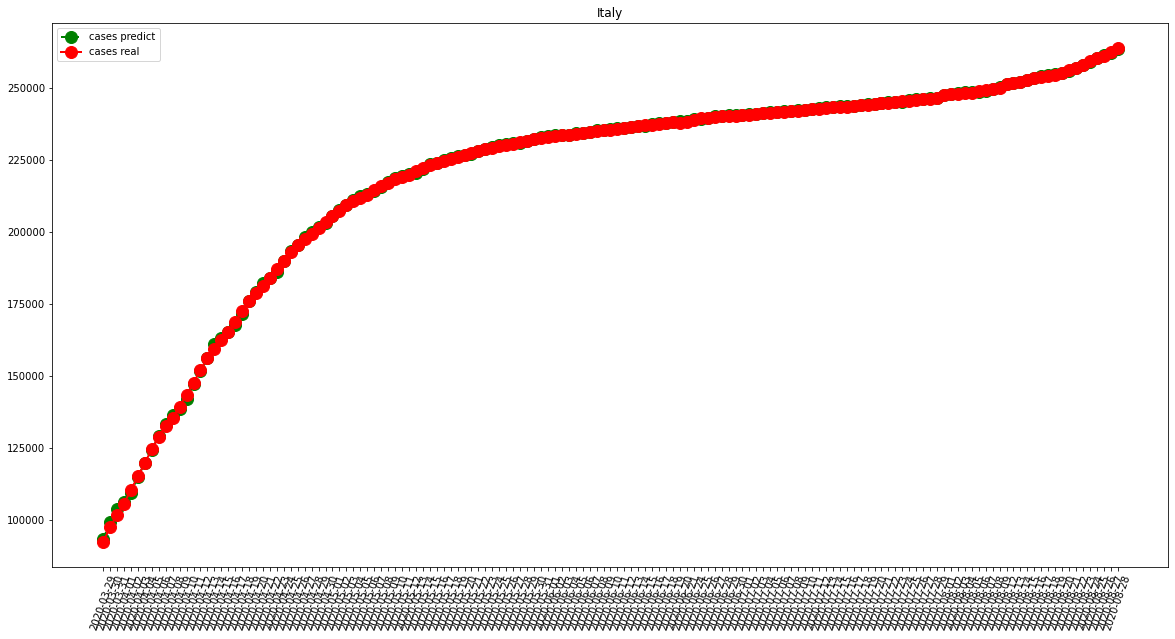

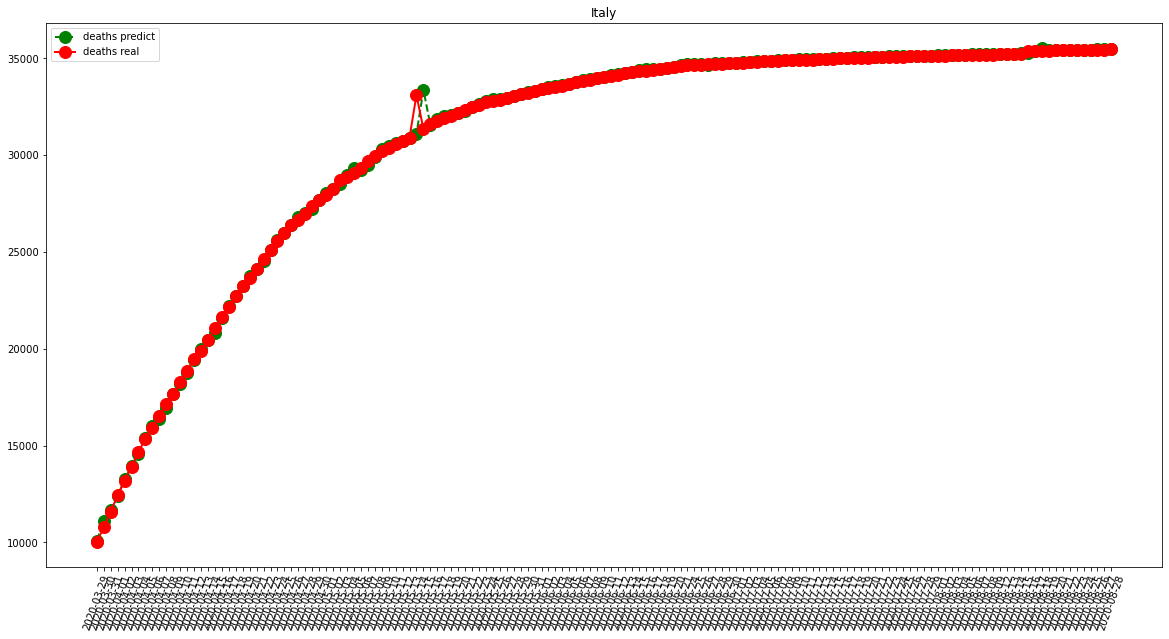

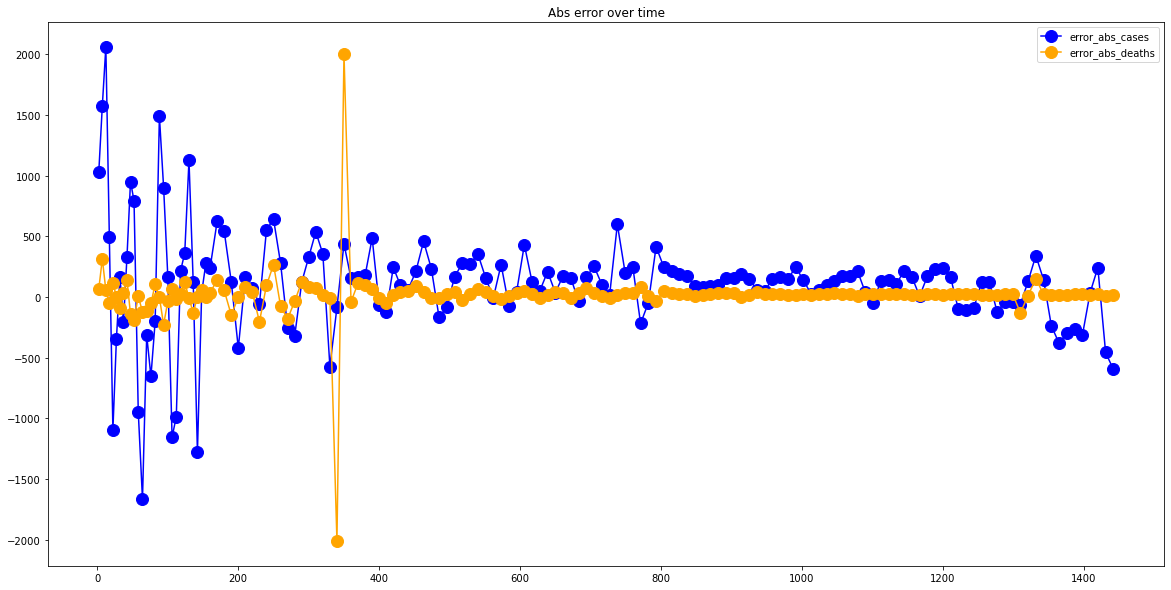

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1724.1148648648648
RMSE =  3312.8048691933773
-- Spain performances for deaths --
MAE =  128.74324324324326
RMSE =  333.95504633554043


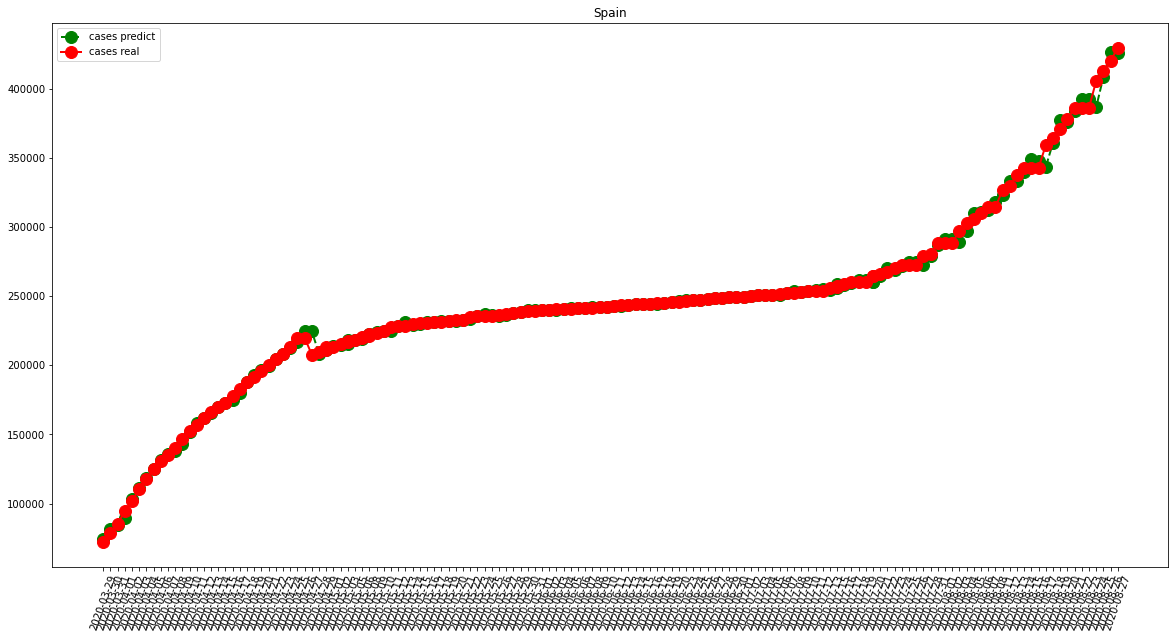

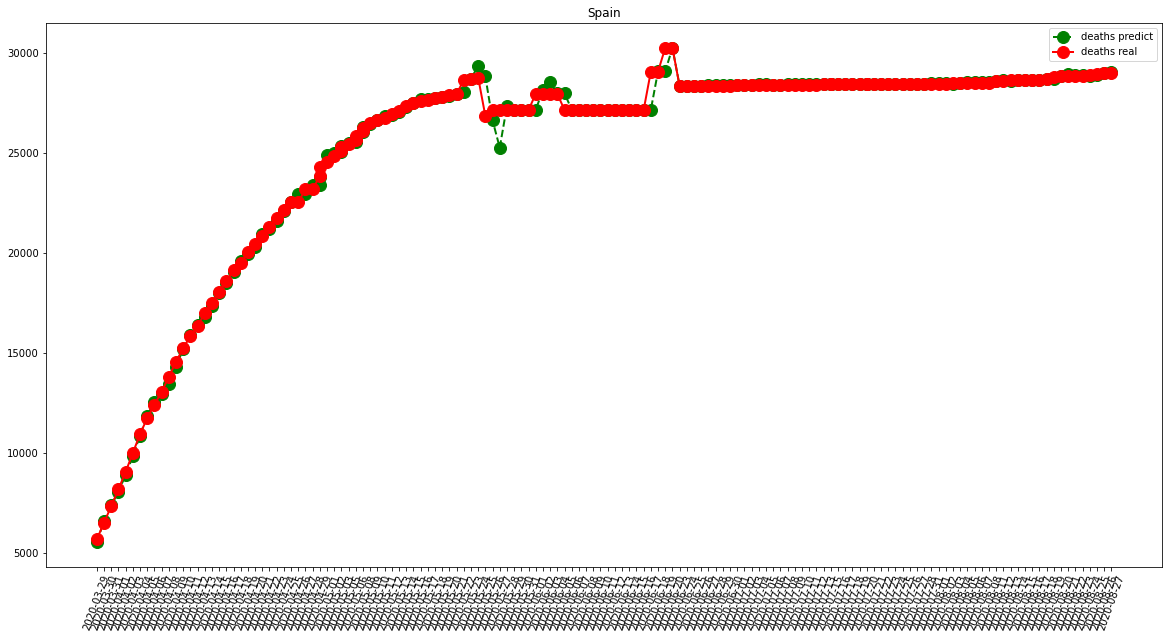

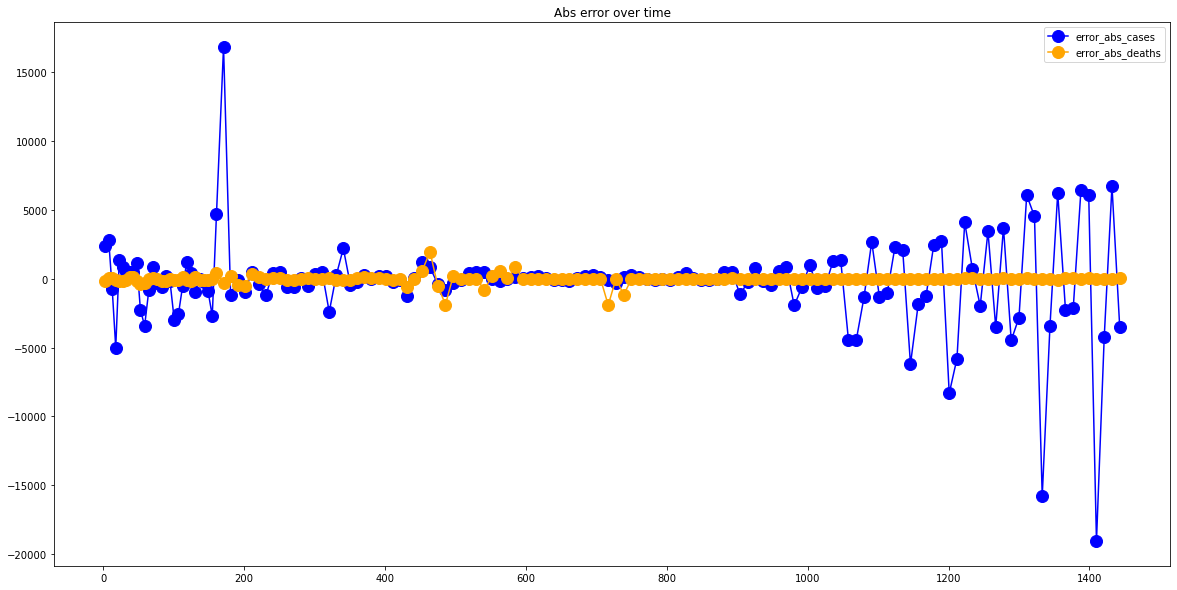

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  11233.074324324325
RMSE =  17724.841077509638
-- United States performances for deaths --
MAE =  490.43243243243245
RMSE =  695.8898444981617


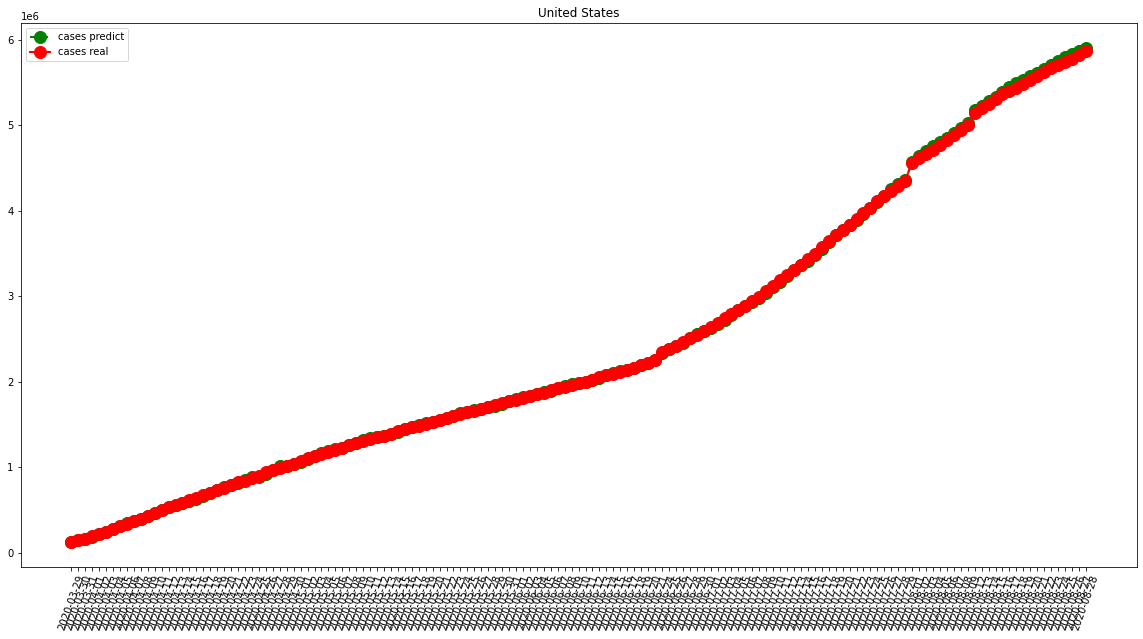

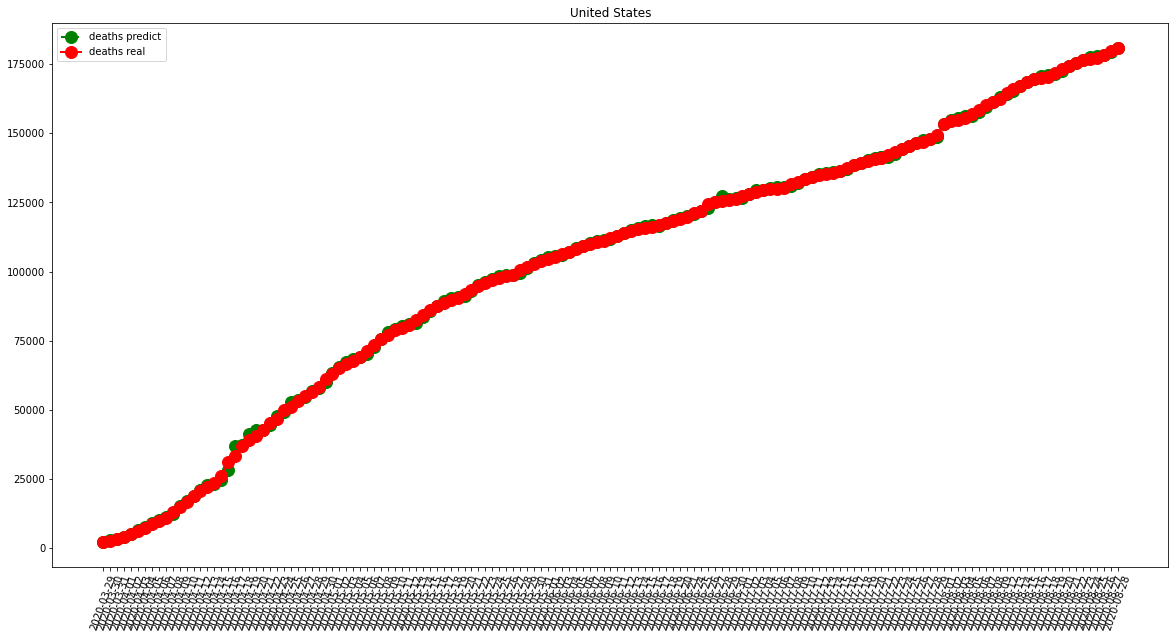

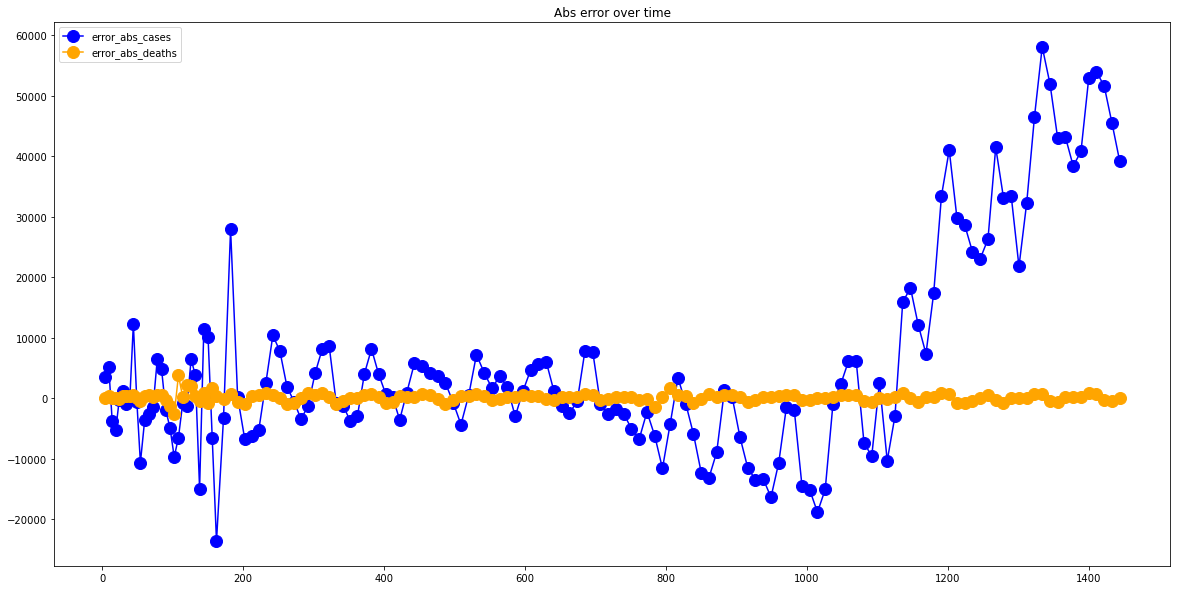

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  67.35135135135135
RMSE =  98.06609740098492
-- China performances for deaths --
MAE =  28.0472972972973
RMSE =  129.0690418635219


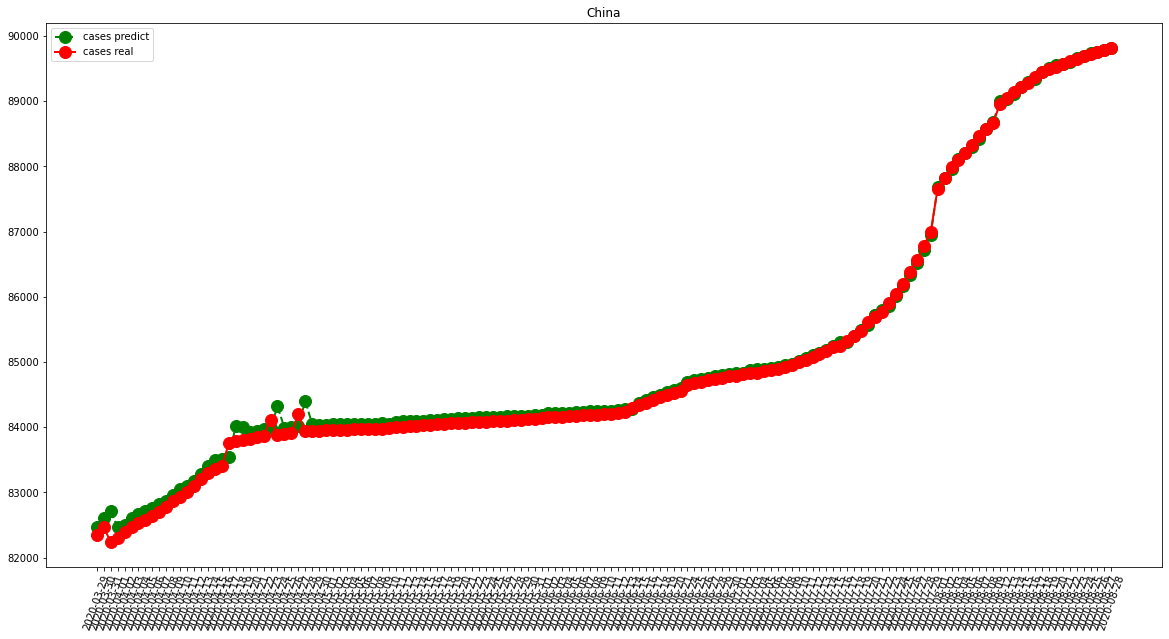

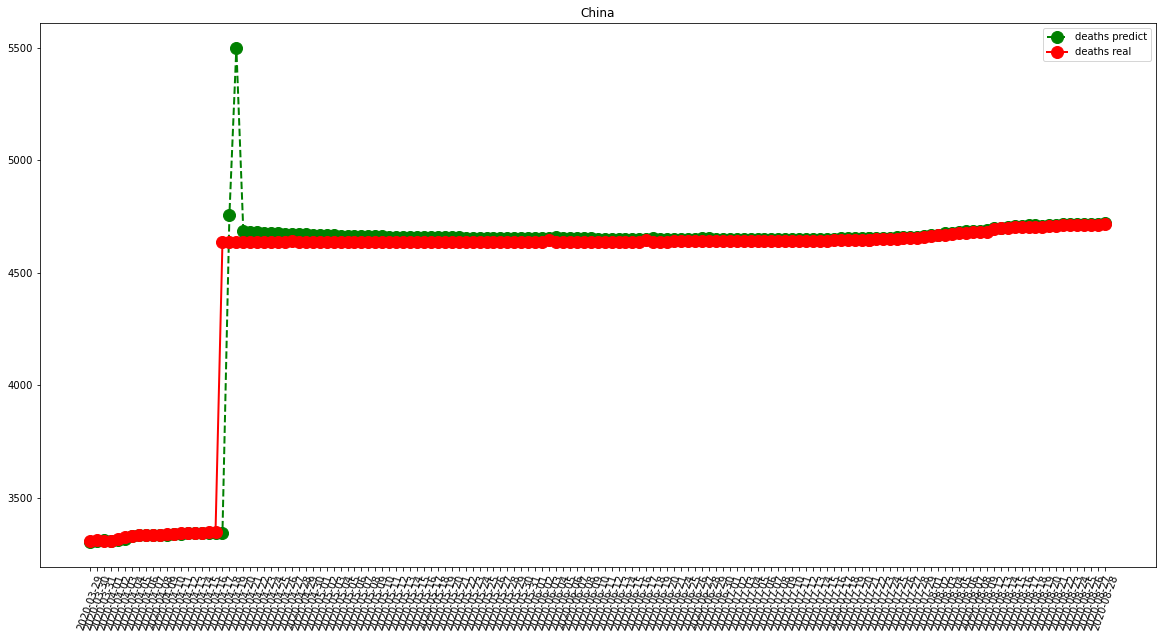

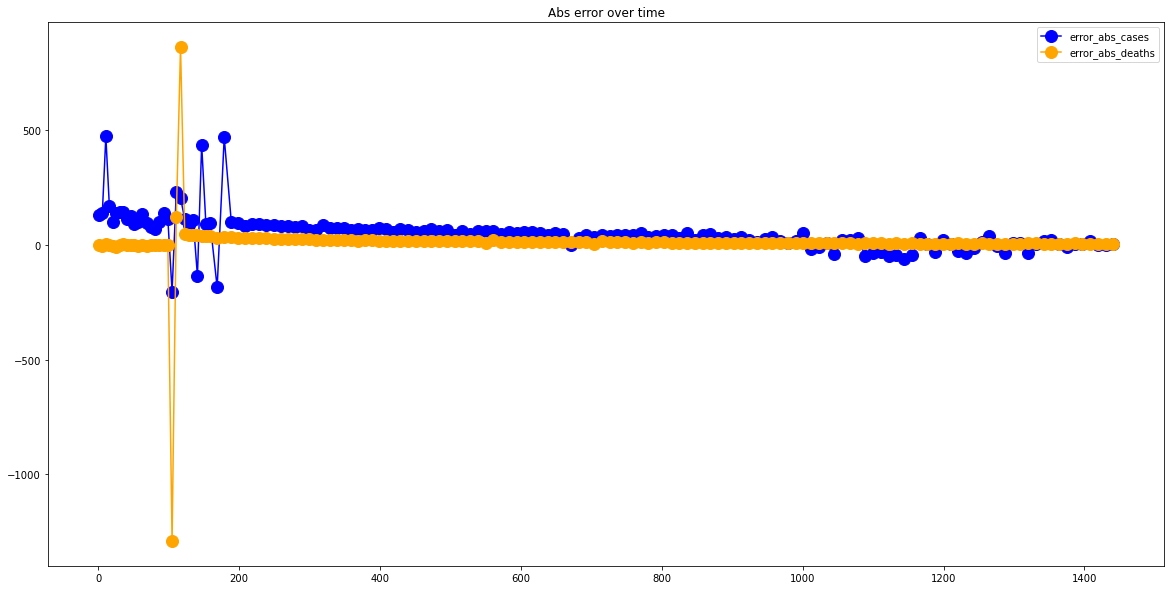

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1085.6916666666666
RMSE =  3816.6280896885933
-- United Kingdom performances for deaths --
MAE =  250.66666666666666
RMSE =  779.0203677268864


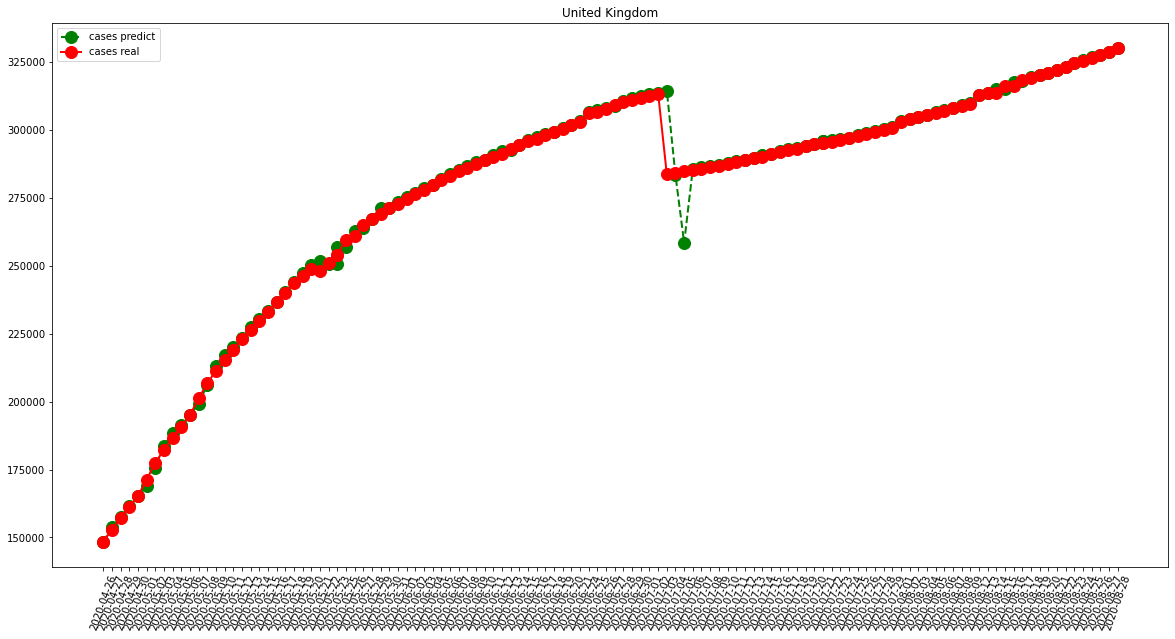

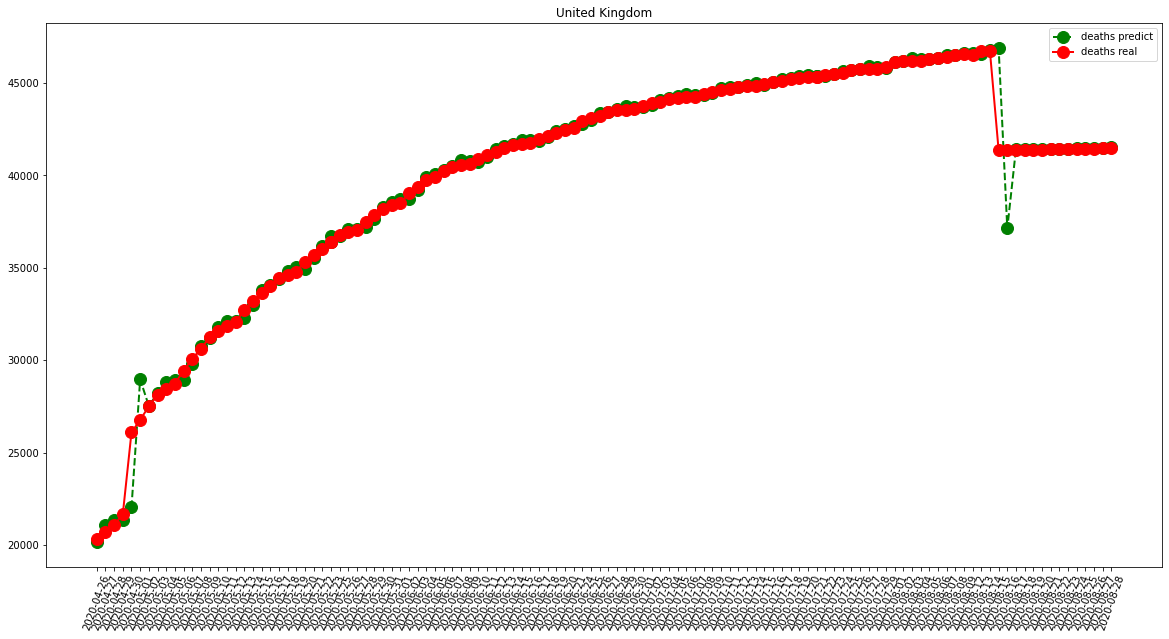

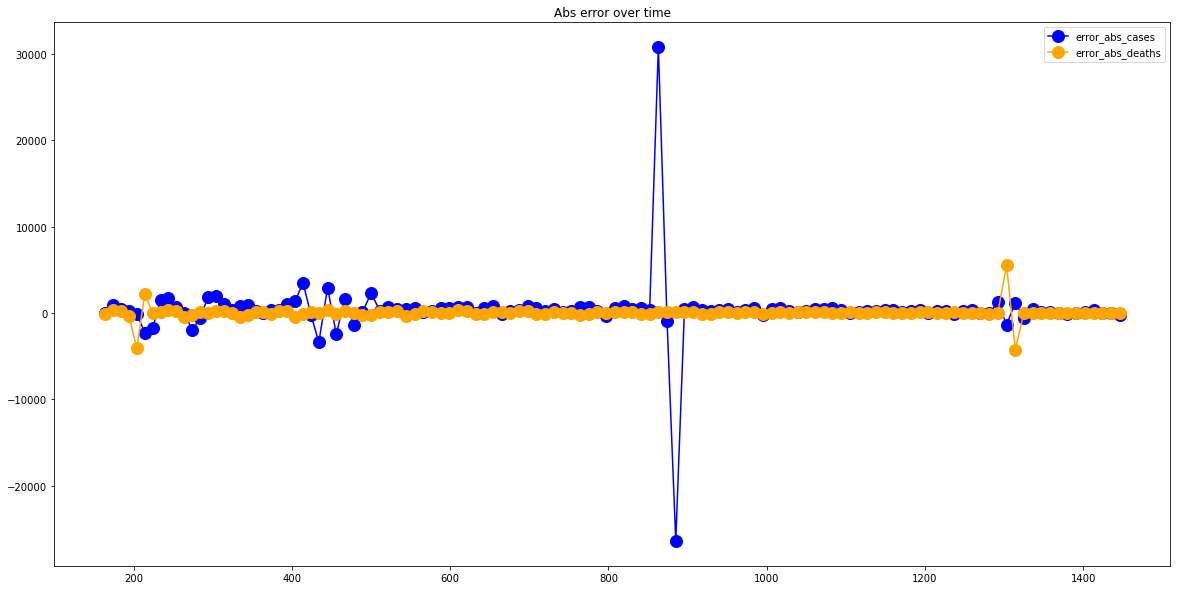

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  397.19166666666666
RMSE =  585.8019218700692
-- Germany performances for deaths --
MAE =  21.55
RMSE =  40.101745597916306


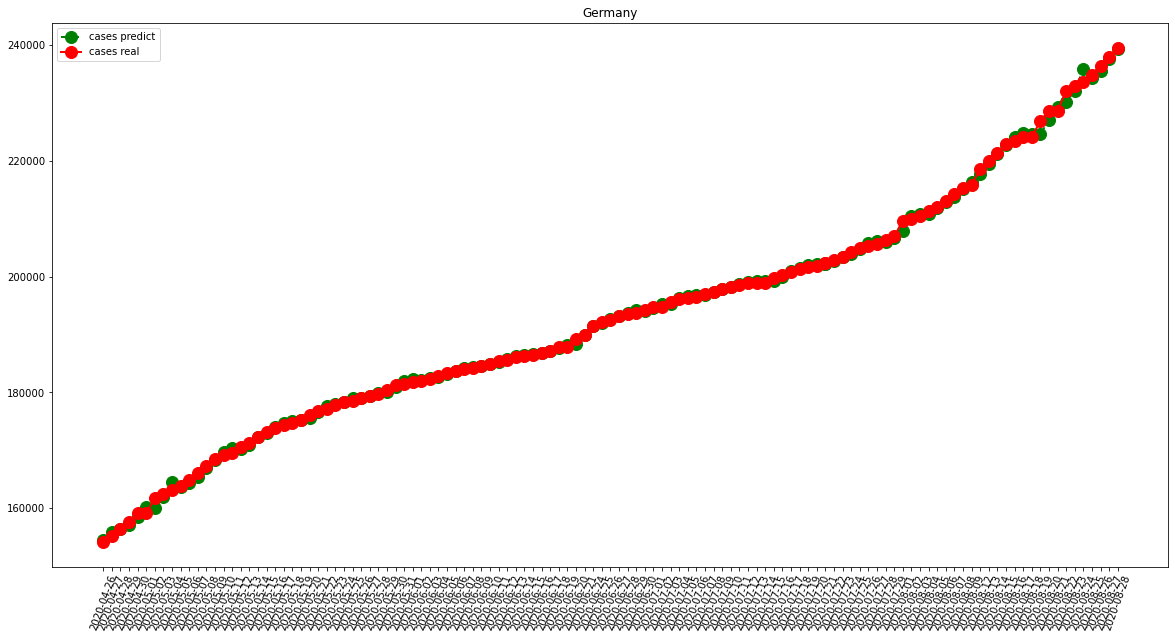

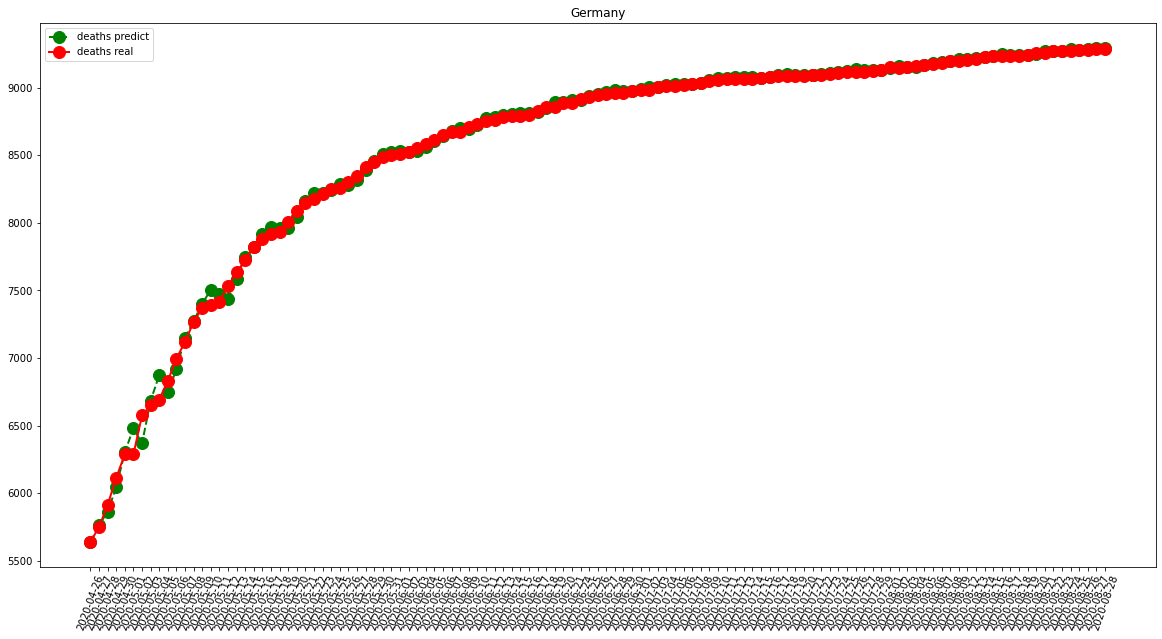

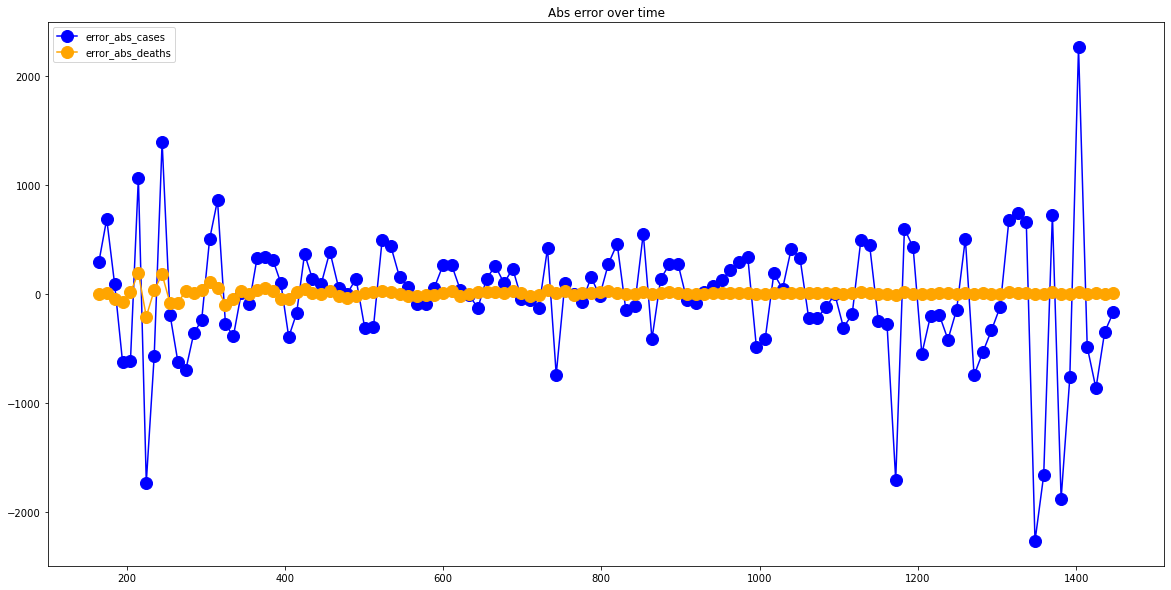

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  757.6666666666666
RMSE =  1126.9416947355055
-- Iran performances for deaths --
MAE =  41.641666666666666
RMSE =  79.73356674993704


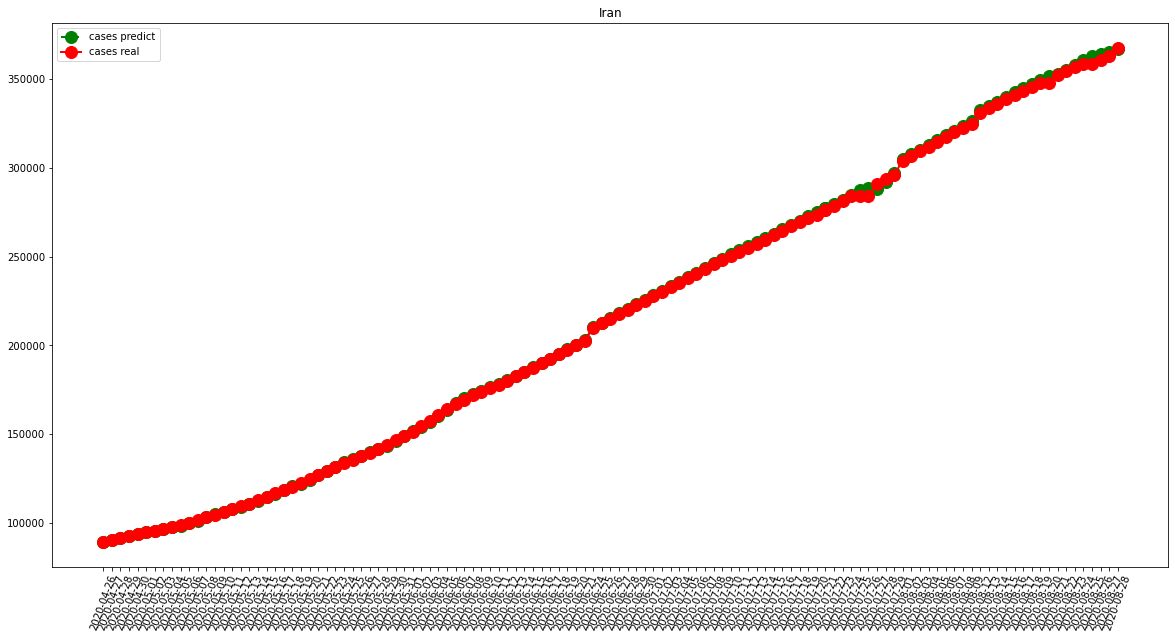

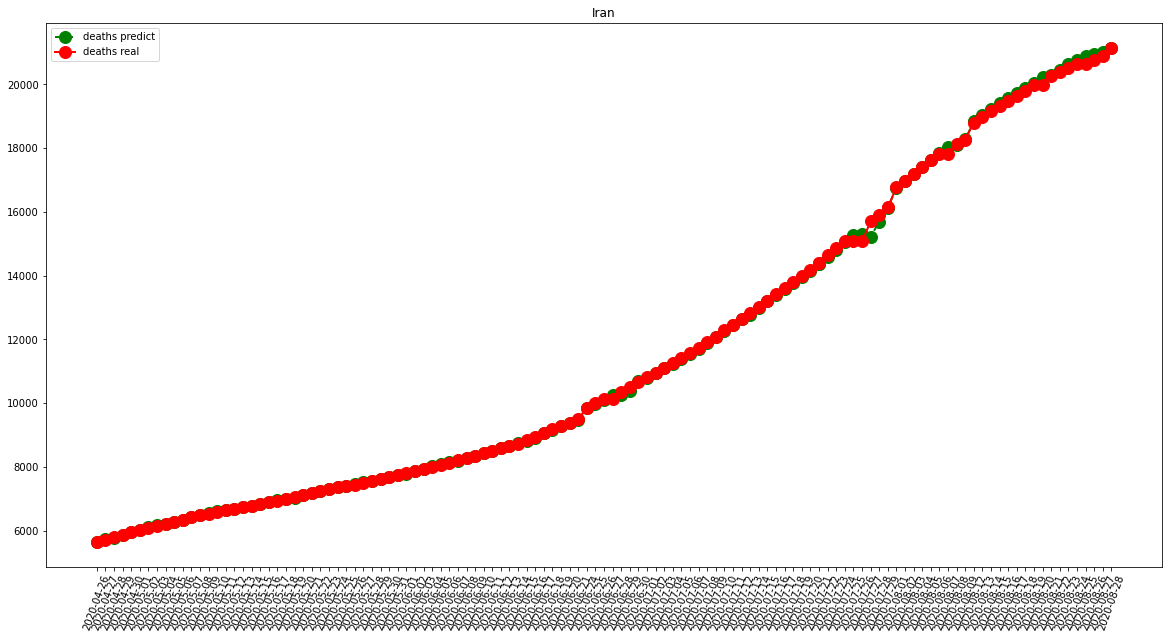

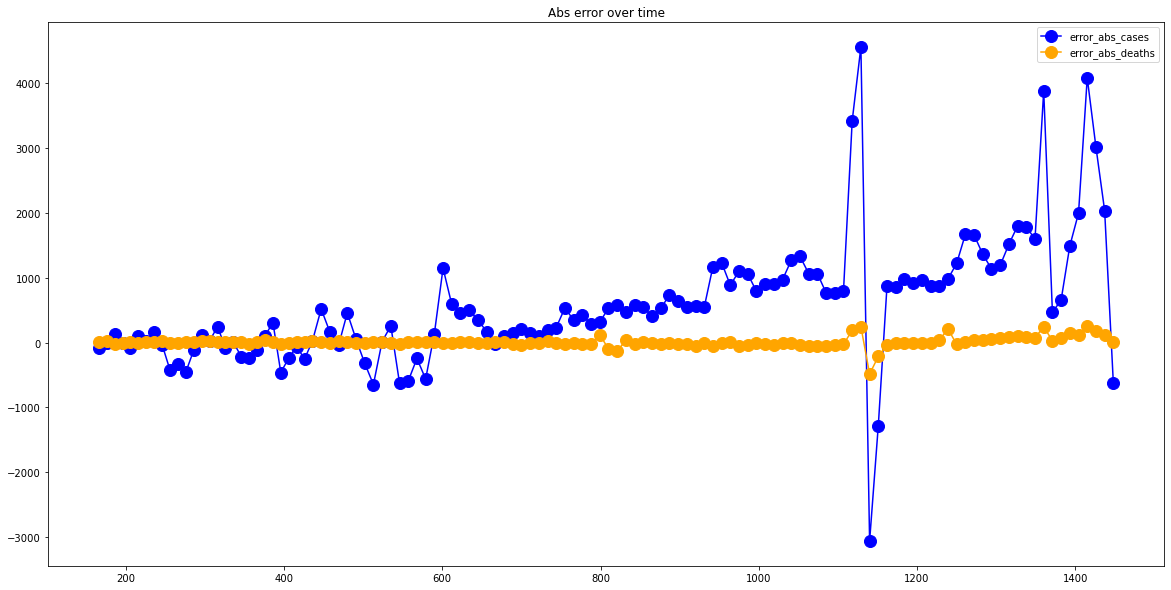

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.43333333333334
RMSE =  326.3572173758891
-- Turkey performances for deaths --
MAE =  16.35
RMSE =  92.67946554298494


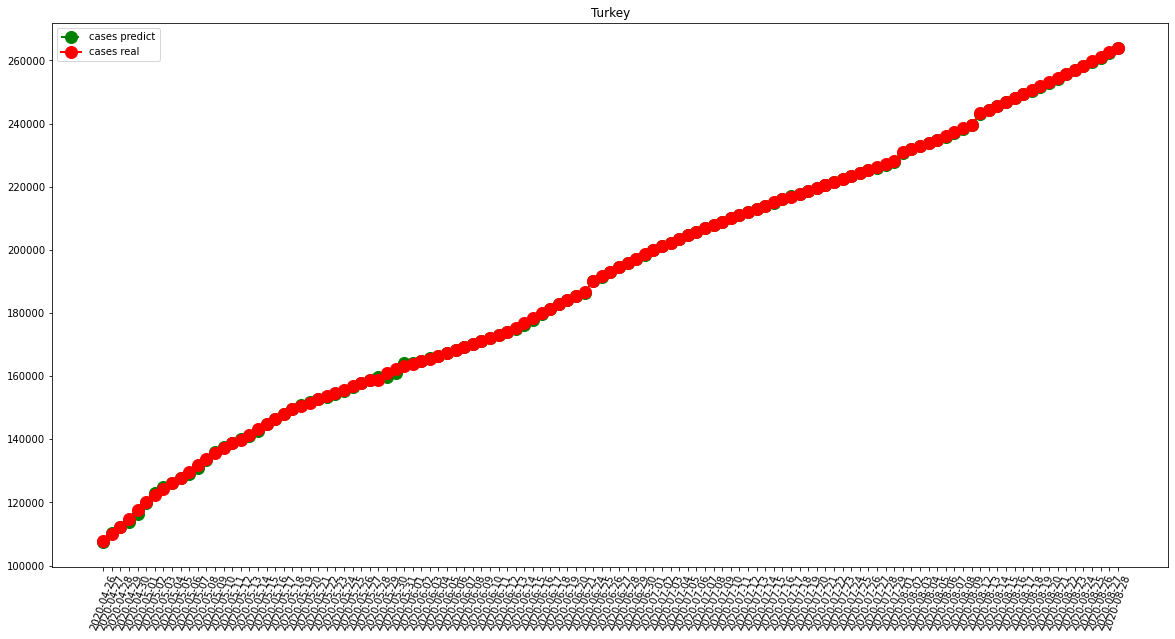

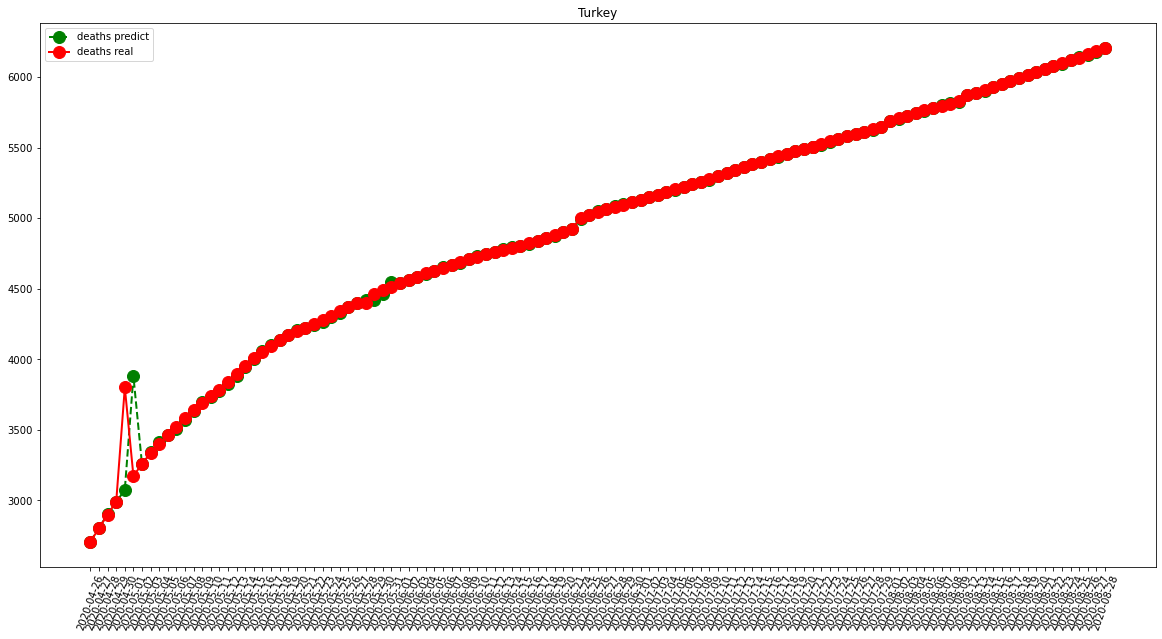

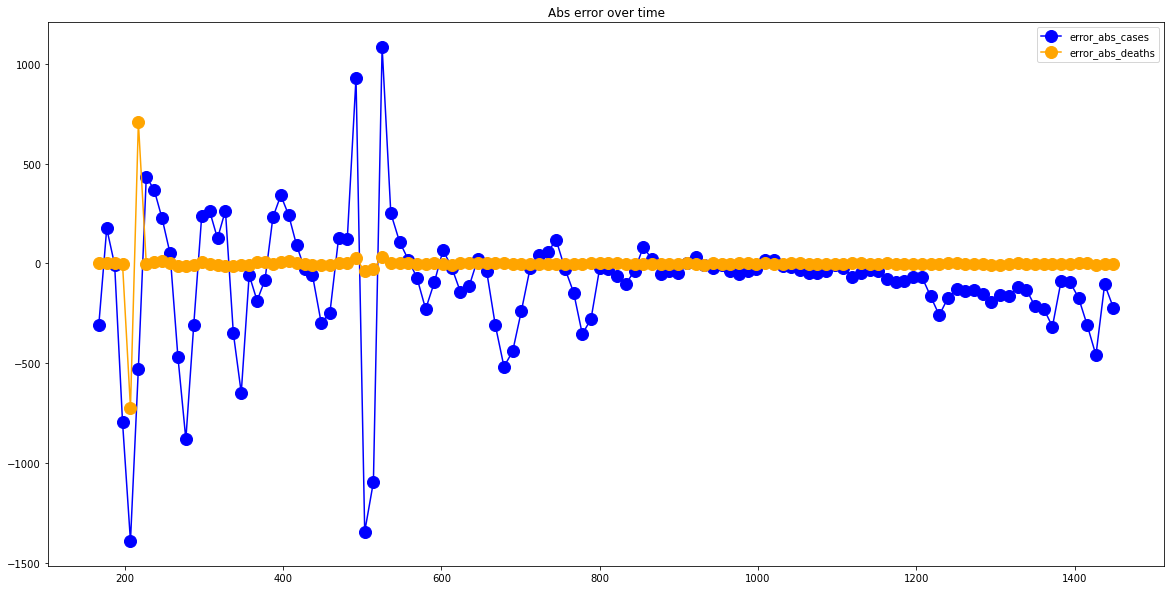

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13441.161290322581
RMSE =  18006.358449229832
-- Brazil performances for deaths --
MAE =  419.9247311827957
RMSE =  516.2362862350984


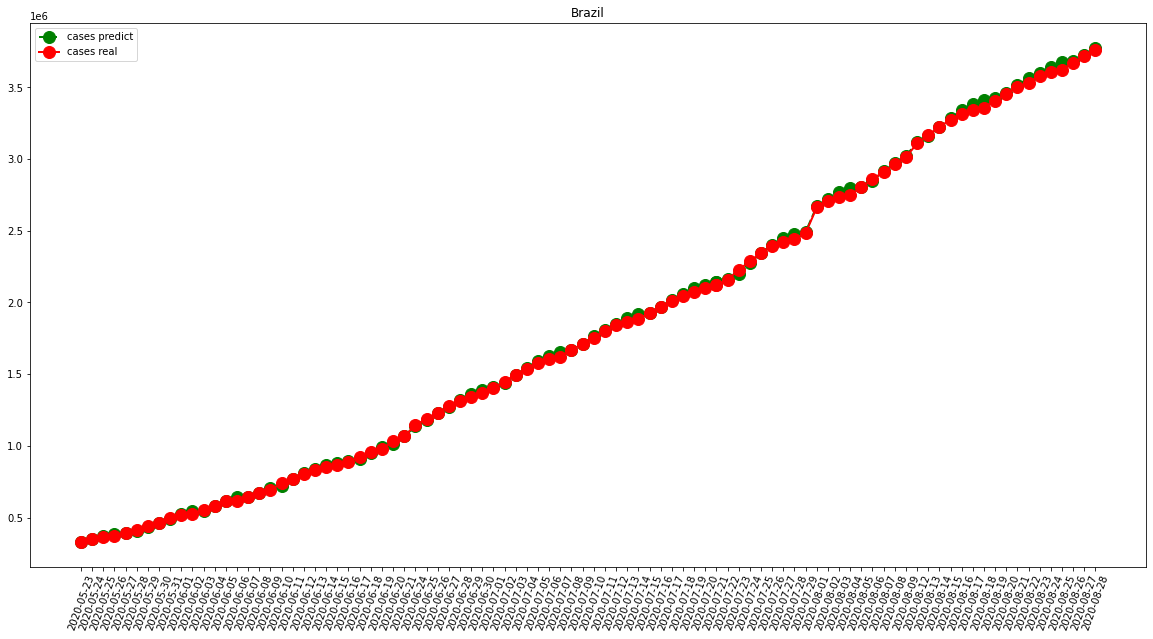

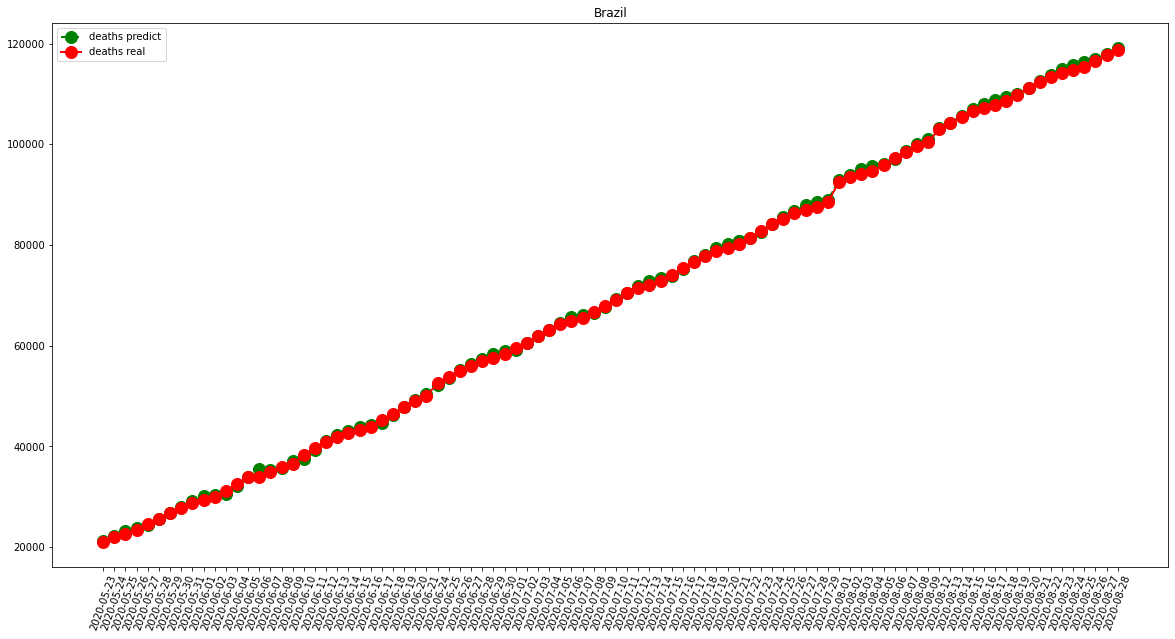

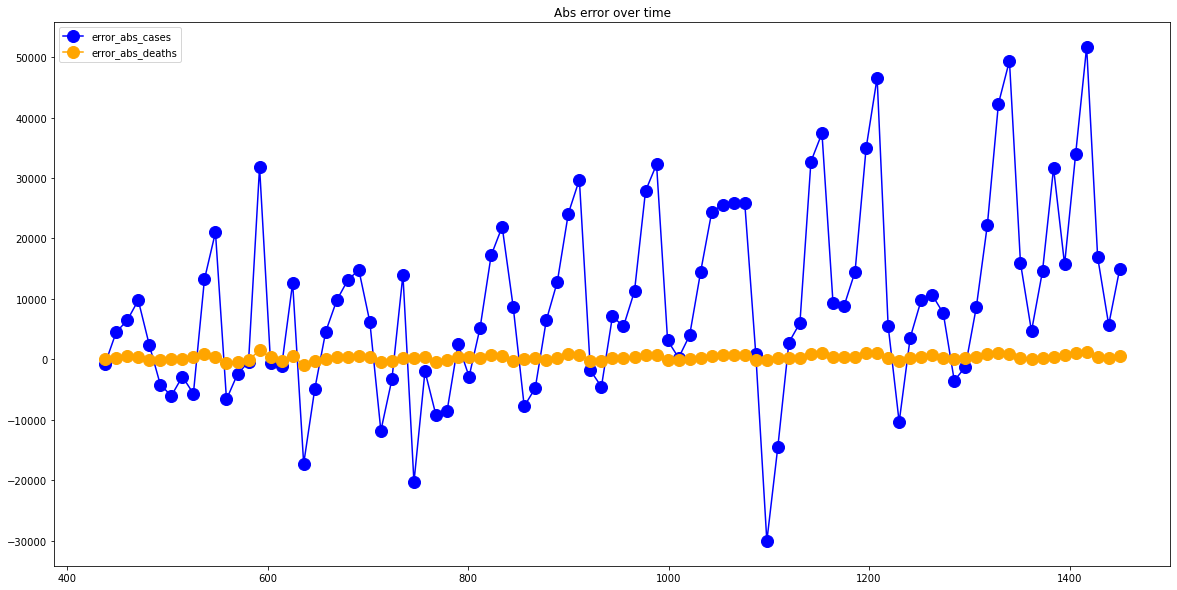

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)